In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

key = '2b1b51cb6cacd2a75465fb1f00658932f347374e'

In [2]:
#Technology Characteristics of Businesses for=us Year=2018
url4 = f'https://api.census.gov/data/2018/abstcb?get=GEO_ID,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP_LABEL,NSFSZFI_LABEL,FACTORS_P,FACTORS_P_LABEL,FACTORS_U,FACTORS_U_LABEL,FIRMPDEMP,FIRMPDEMP_F,FIRMPDEMP_PCT,FIRMPDEMP_PCT_F,RCPPDEMP,RCPPDEMP_F,RCPPDEMP_PCT,RCPPDEMP_PCT_F,EMP,EMP_F,EMP_PCT,EMP_PCT_F,PAYANN,PAYANN_F,PAYANN_PCT,PAYANN_PCT_F,FIRMPDEMP_S,FIRMPDEMP_S_F,FIRMPDEMP_PCT_S,FIRMPDEMP_PCT_S_F,RCPPDEMP_S,RCPPDEMP_S_F,RCPPDEMP_PCT_S,RCPPDEMP_PCT_S_F,EMP_S,EMP_S_F,EMP_PCT_S,EMP_PCT_S_F,PAYANN_S,PAYANN_S_F,PAYANN_PCT_S,PAYANN_PCT_S_F&for=us:*&key={key}'
response4 = requests.get(url4)
data4 = json.loads(response4.text)
techchar = pd.DataFrame.from_dict(data4)
newcolumns4 = techchar.iloc[0]
# Remove the first row from the DataFrameNAICS2017_LABEL,
techchar = techchar.iloc[1:]
# Rename the columns using the `rename()` method
techchar.rename(columns=newcolumns4, inplace=True)
techchar.reset_index(inplace = True)

In [3]:
#Change to numeric
techchar[['FIRMPDEMP','FIRMPDEMP_PCT','RCPPDEMP','RCPPDEMP_PCT','PAYANN','PAYANN_PCT','FIRMPDEMP_S','FIRMPDEMP_PCT_S','RCPPDEMP_S','RCPPDEMP_PCT_S','EMP','EMP_PCT','EMP_S','EMP_PCT_S','PAYANN_S','PAYANN_PCT_S']] = techchar[['FIRMPDEMP','FIRMPDEMP_PCT','RCPPDEMP','RCPPDEMP_PCT','PAYANN','PAYANN_PCT','FIRMPDEMP_S','FIRMPDEMP_PCT_S','RCPPDEMP_S','RCPPDEMP_PCT_S','EMP','EMP_PCT','EMP_S','EMP_PCT_S','PAYANN_S','PAYANN_PCT_S']].apply(pd.to_numeric)

In [4]:
#Remove Total Row
indexAge = techchar[(techchar['RACE_GROUP_LABEL'] == 'Total')].index
techchar.drop(indexAge , inplace=True)

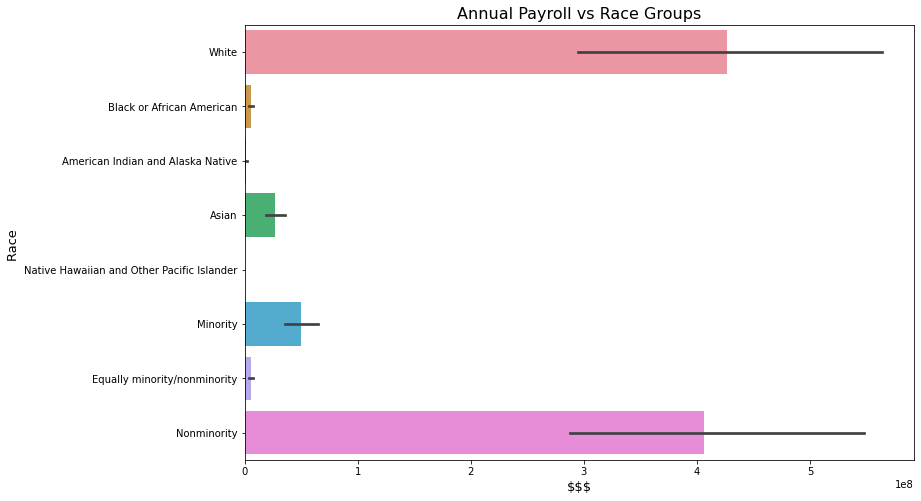

In [5]:
sns.set_palette(palette= 'rainbow')

#change size:
plt.figure(figsize= (12,8))

#seaborn barplot
sns.barplot(y= techchar['RACE_GROUP_LABEL'], x= techchar['PAYANN']);

#rotate tick marks
# plt.xticks(rotation= );
#add rotation in degrees

#add descriptive title

plt.title('Annual Payroll vs Race Groups', size= 16);
plt.xlabel('$$$', size= 13);
plt.ylabel('Race ', size = 13);
plt.show()